In [120]:
import numpy as np
import pandas as pd
from pandas import Series , DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [121]:
dFrame = pd.read_csv("Social_Network_Ads.csv")
df = dFrame
df.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0


In [122]:
df.drop(["User ID", "EstimatedSalary"], axis=1, inplace=True)

In [123]:
df.head(2)

,Gender,Age,Purchased
0,Male,19,0
1,Male,35,0


In [124]:
df = pd.get_dummies(df, drop_first=True)
df.head(2)

,Age,Purchased,Gender_Male
0,19,0,1
1,35,0,1


In [125]:
df.rename(columns={"Gender_Male":"gender", "Age":"age", "EstimatedSalary":"salary", "Purchased":"purchased"},
          inplace=True)
df.head(2)

,age,purchased,gender
0,19,0,1
1,35,0,1


In [126]:
x = df.loc[:, df.columns != "purchased"].values
y = df.loc[:, df.columns == "purchased"].values

In [127]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Lets First Try for Entropy/ Information Gain Method

In [152]:
model = DecisionTreeClassifier(criterion="entropy",max_depth=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [153]:
print classification_report(y_test, y_pred)
print "Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred) * 100)

             precision    recall  f1-score   support

          0       0.97      0.94      0.96        68
          1       0.88      0.94      0.91        32

avg / total       0.94      0.94      0.94       100

Accuracy: 94.00 %


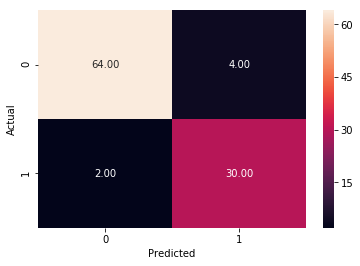

In [154]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.2f')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [155]:
print model.feature_importances_

[0.48153353 0.51846647]


In [156]:
print model.get_params

<bound method DecisionTreeClassifier.get_params of DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')>


# Lets First Try for Gini Index Method

In [138]:
model = DecisionTreeClassifier(criterion="gini")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [139]:
print classification_report(y_test, y_pred)
print "Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred) * 100)

             precision    recall  f1-score   support

          0       0.81      0.98      0.89        63
          1       0.96      0.59      0.73        37

avg / total       0.86      0.84      0.83       100

Accuracy: 84.00 %


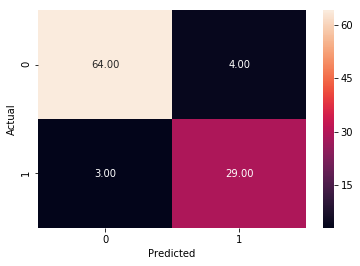

In [151]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.2f')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [141]:
print model.feature_importances_

[0.95399257 0.04600743]


# Random Forest

In [142]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values
dataset.columns

Index([u'User ID', u'Gender', u'Age', u'EstimatedSalary', u'Purchased'], dtype='object')

In [143]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [145]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'gini', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [146]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [147]:

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 3, 29]])

In [148]:
print classification_report(y_test, y_pred)
print "Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred) * 100)

             precision    recall  f1-score   support

          0       0.96      0.94      0.95        68
          1       0.88      0.91      0.89        32

avg / total       0.93      0.93      0.93       100

Accuracy: 93.00 %


In [149]:
classifier.feature_importances_

array([0.48777687, 0.51222313])